# **Anomaly Detection in Ethereum DATASET**


# **Ethereum DATASET**


In [98]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary modules
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Ethereum data
eth_file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/transaction_dataset.csv'
eth_df = pd.read_csv(eth_file_path)

# Select relevant columns
eth_df = eth_df[['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx', 'Time Diff between first and last (Mins)',
       'Sent tnx', 'Received Tnx', 'Number of Created Contracts',
       'Unique Received From Addresses', 'Unique Sent To Addresses',
       'min value received', 'max value received ', 'avg val received',
       'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type']]

# Select numeric columns only
eth_df = eth_df.select_dtypes(include=['number'])
target_column = 'FLAG'


# Scale data
scaler = RobustScaler()
for col in eth_df.columns[:-1]:  # Exclude the target column
    eth_df[col] = scaler.fit_transform(eth_df[col].values.reshape(-1, 1))


# Define features (X) and target (y)
X = eth_df.drop(columns=[target_column])
y = eth_df[target_column]

# Split data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.20, random_state=10)
# Drop rows with missing values
X_train_full = X_train_full.dropna()
X_test_full = X_test_full.dropna()

# Align the target variable
y_train_full = y_train_full[X_train_full.index]
y_test_full = y_test_full[X_test_full.index]

# Apply SMOTE to handle class imbalance
#X_train_full, y_train_full = SMOTE(sampling_strategy=0.3, n_jobs=-1).fit_resample(X_train, y_train)

# Check the shape of the SMOTE-adjusted dataset
print("Shape of X_train_full:", X_train_full.shape)
print("Shape of y_train_full:", y_train_full.shape)
# Check class distribution in y_train_full
print("Class distribution in y_train_full:")
print(pd.Series(y_train_full).value_counts())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of X_train_full: (7208, 45)
Shape of y_train_full: (7208,)
Class distribution in y_train_full:
FLAG
0.0    6103
1.0    1105
Name: count, dtype: int64


Tabnet Model

In [99]:
eth_df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0.0,1.462359,0.106551,2.166715,71.8,3.269231,0.0,9.50,58.0,-0.047952,...,151515.151515,9013.714486,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0
1,0.0,22.444568,0.446806,3.857001,9.1,0.153846,0.0,0.75,6.0,-0.047952,...,3.686869,1.955990,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0
2,0.0,435.349709,0.351116,1.547608,-0.1,0.230769,0.0,2.00,0.0,0.008636,...,4.472928,2.212446,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0
3,0.0,18.042089,2.787269,1.155273,2.2,0.192308,0.0,1.25,5.5,-0.047952,...,115.275057,52.793737,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0
4,0.0,0.034078,1.860816,1.105616,459.5,0.615385,1.0,1.25,8.5,-0.047952,...,909.090909,167.462649,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0


In [2]:
pip install pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.6 MB/s eta 0:00:00


# **NN model**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Top Correlated Features: ['Time Diff between first and last (Mins)', 'Avg min between received tnx', 'total transactions (including tnx to create contract', 'Received Tnx', 'Sent tnx', 'avg val sent', 'Unique Sent To Addresses', 'Unique Received From Addresses', 'Avg min between sent tnx', 'max val sent', 'min value received', ' Total ERC20 tnxs', ' ERC20 min val sent', ' ERC20 avg val sent', ' ERC20 max val sent', ' ERC20 total ether sent', 'max value received ', ' ERC20 uniq sent addr', 'total ether received', ' ERC20 uniq rec contract addr', 'total Ether sent', ' ERC20 uniq rec token name', ' ERC20 uniq rec addr', 'Number of Created Contracts', 'avg val received']
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7748 - loss: 0.5141 - val_accuracy: 0.8590 - val_loss: 0.3275
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8631 - loss: 0.3460 - val_accuracy: 0.8730 - val_loss: 0.2712
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8843 - loss: 0.2872 - val_accuracy: 0.9276 - val_loss: 0.2440
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8913 - loss: 0.2696 - val_accuracy: 0.9327 - val_loss: 0.2236
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9140 - loss: 0.2379 - val_accuracy: 0.9384 - val_loss: 0.2020
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9193 - loss: 0.2254 - val_accuracy: 0.9416 - val_loss: 0.1846
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9250 - loss: 0.2054 - val_accuracy: 0.9422 - val_loss: 0.1726
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9322 - loss: 0.1894 - val_accuracy: 0.9429 - va

NN Accuracy: 96.19%


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9548 - loss: 0.1240


NN Accuracy: 96.19%


Model saved to: /content/drive/MyDrive/BlockChainAnomaly/Data/nn_Ethereum_model.h5
Model reloaded successfully.


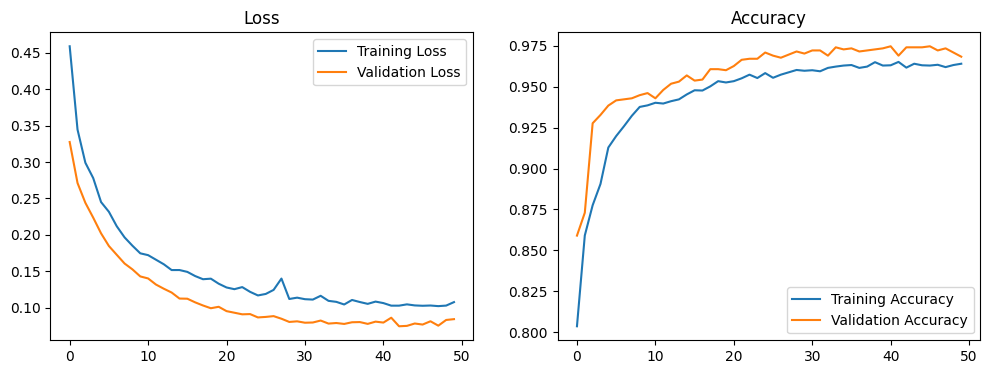

In [101]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary modules
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# Set reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Ethereum data
eth_file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/transaction_dataset.csv'
eth_df = pd.read_csv(eth_file_path)

# Select relevant columns
eth_df = eth_df[['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx', 'Time Diff between first and last (Mins)',
       'Sent tnx', 'Received Tnx', 'Number of Created Contracts',
       'Unique Received From Addresses', 'Unique Sent To Addresses',
       'min value received', 'max value received ', 'avg val received',
       'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type']]

# Select numeric columns only
eth_df = eth_df.select_dtypes(include=['number'])
target_column = 'FLAG'

# Replace NaN values with zeros
#eth_df = eth_df.fillna(0)
# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with mean
eth_df = pd.DataFrame(imputer.fit_transform(eth_df), columns=eth_df.columns)

# Compute correlations with the target variable
correlation = eth_df.corr()
top_features = correlation[target_column].abs().sort_values(ascending=False).index[1:26]  # Select top 26 features
print("Top Correlated Features:", list(top_features))

# Create dataset with top correlated features
eth_df_top = eth_df[top_features.to_list() + [target_column]]

# Define features (X) and target (y)
X = eth_df_top.drop(columns=[target_column])
y = eth_df_top[target_column].astype(int)  # Ensure the target is binary

# Split data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Scale data to avoid data leakage
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)


# Build and train the model
nn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_full.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_nn = nn_model.fit(X_train_full, y_train_full, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
nn_loss, nn_acc = nn_model.evaluate(X_test_full, y_test_full)
print(f"NN Accuracy: {nn_acc * 100:.2f}%")

# Save the model
model_path = 'content/drive/MyDrive/BlockChainAnomaly/Data/nn_Ethereum_model.h5'
nn_model.save(model_path)  # Save the model in HDF5 format

# Load the model for further use
nn_model_loaded = models.load_model(model_path)
# Evaluate the model
nn_loss, nn_acc = nn_model.evaluate(X_test_full, y_test_full)
print(f"NN Accuracy: {nn_acc * 100:.2f}%")

# Save the model
model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/nn_Ethereum_model.h5'
import os
os.makedirs(os.path.dirname(model_path), exist_ok=True)
nn_model.save(model_path)
print(f"Model saved to: {model_path}")

# Reload the model
nn_model = models.load_model(model_path)
print("Model reloaded successfully.")

# Plot training history
plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_nn.history['loss'], label='Training Loss')
plt.plot(history_nn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_nn.history['accuracy'], label='Training Accuracy')
plt.plot(history_nn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


# **CNN model**

In [102]:
import os
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary modules
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# Set reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Ethereum data
eth_file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/transaction_dataset.csv'
eth_df = pd.read_csv(eth_file_path)

# Select relevant columns
eth_df = eth_df[['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx', 'Time Diff between first and last (Mins)',
       'Sent tnx', 'Received Tnx', 'Number of Created Contracts',
       'Unique Received From Addresses', 'Unique Sent To Addresses',
       'min value received', 'max value received ', 'avg val received',
       'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type']]

# Select numeric columns only
eth_df = eth_df.select_dtypes(include=['number'])
target_column = 'FLAG'

# Replace NaN values with zeros
#eth_df = eth_df.fillna(0)
# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with mean
eth_df = pd.DataFrame(imputer.fit_transform(eth_df), columns=eth_df.columns)

# Compute correlations with the target variable
correlation = eth_df.corr()
top_features = correlation[target_column].abs().sort_values(ascending=False).index[1:26]  # Select top 26 features
print("Top Correlated Features:", list(top_features))

# Create dataset with top correlated features
eth_df_top = eth_df[top_features.to_list() + [target_column]]

# Define features (X) and target (y)
X = eth_df_top.drop(columns=[target_column])
y = eth_df_top[target_column].astype(int)  # Ensure the target is binary

# Split data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Scale data to avoid data leakage
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

# Reshape for Conv1D
X_train_reshaped = X_train_full.reshape(-1, X_train_full.shape[1], 1)
X_test_reshaped = X_test_full.reshape(-1, X_test_full.shape[1], 1)

# Build a Conv1D model
cnn_model = models.Sequential([
    layers.Conv1D(32, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = cnn_model.fit(X_train_reshaped, y_train_full, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_reshaped, y_test_full)
print(f"CNN Accuracy: {cnn_acc * 100:.2f}%")


# Define save path
model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/cnn_Ethereum_model.h5'

# Ensure directory exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the model
cnn_model.save(model_path)
print(f"Model saved to: {model_path}")

# Reload the model
cnn_model_loaded = models.load_model(model_path)
print("Model reloaded successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Top Correlated Features: ['Time Diff between first and last (Mins)', 'Avg min between received tnx', 'total transactions (including tnx to create contract', 'Received Tnx', 'Sent tnx', 'avg val sent', 'Unique Sent To Addresses', 'Unique Received From Addresses', 'Avg min between sent tnx', 'max val sent', 'min value received', ' Total ERC20 tnxs', ' ERC20 min val sent', ' ERC20 avg val sent', ' ERC20 max val sent', ' ERC20 total ether sent', 'max value received ', ' ERC20 uniq sent addr', 'total ether received', ' ERC20 uniq rec contract addr', 'total Ether sent', ' ERC20 uniq rec token name', ' ERC20 uniq rec addr', 'Number of Created Contracts', 'avg val received']
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7909 - loss: 0.4960 - val_accuracy: 0.8508 - val_loss: 0.3243
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8605 - loss: 0.3163 - val_accuracy: 0.8616 - val_loss: 0.2716
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8780 - loss: 0.2672 - val_accuracy: 0.9206 - val_loss: 0.2340
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9086 - loss: 0.2314 - val_accuracy: 0.9365 - val_loss: 0.2051
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9282 - loss: 0.2040 - val_accuracy: 0.9416 - val_loss: 0.1831
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9350 - loss: 0.1834 - val_accuracy: 0.9429 - val_loss: 0.1681
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9382 - loss: 0.1703 - val_accuracy: 0.9416 - val_loss: 0.1620
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9418 - loss: 0.1625 - val_accuracy: 0.9416 - va

CNN Accuracy: 95.94%


Model saved to: /content/drive/MyDrive/BlockChainAnomaly/Data/cnn_Ethereum_model.h5
Model reloaded successfully.


# **Tabnet model**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Top Correlated Features: ['Time Diff between first and last (Mins)', 'Avg min between received tnx', 'total transactions (including tnx to create contract', 'Received Tnx', 'Sent tnx', 'avg val sent', 'Unique Sent To Addresses', 'Unique Received From Addresses', 'Avg min between sent tnx', 'max val sent', 'min value received', ' Total ERC20 tnxs', ' ERC20 min val sent', ' ERC20 avg val sent', ' ERC20 max val sent', ' ERC20 total ether sent', 'max value received ', ' ERC20 uniq sent addr', 'total ether received', ' ERC20 uniq rec contract addr', 'total Ether sent', ' ERC20 uniq rec token name', ' ERC20 uniq rec addr', 'Number of Created Contracts', 'avg val received']


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.63438 | val_0_accuracy: 0.77604 | val_1_accuracy: 0.78111 |  0:00:30s
epoch 1  | loss: 0.5223  | val_0_accuracy: 0.77668 | val_1_accuracy: 0.78314 |  0:00:31s
epoch 2  | loss: 0.46364 | val_0_accuracy: 0.77706 | val_1_accuracy: 0.78263 |  0:00:32s
epoch 3  | loss: 0.43319 | val_0_accuracy: 0.77693 | val_1_accuracy: 0.78314 |  0:00:33s
epoch 4  | loss: 0.40412 | val_0_accuracy: 0.77706 | val_1_accuracy: 0.78314 |  0:00:34s
epoch 5  | loss: 0.39642 | val_0_accuracy: 0.77668 | val_1_accuracy: 0.78365 |  0:00:35s
epoch 6  | loss: 0.36162 | val_0_accuracy: 0.77807 | val_1_accuracy: 0.78415 |  0:00:36s
epoch 7  | loss: 0.32914 | val_0_accuracy: 0.83105 | val_1_accuracy: 0.83494 |  0:00:38s
epoch 8  | loss: 0.30586 | val_0_accuracy: 0.88694 | val_1_accuracy: 0.89385 |  0:00:39s
epoch 9  | loss: 0.2745  | val_0_accuracy: 0.92162 | val_1_accuracy: 0.92636 |  0:00:40s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_1_accuracy = 0.92636


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1542
           1       0.86      0.79      0.82       427

    accuracy                           0.93      1969
   macro avg       0.90      0.88      0.89      1969
weighted avg       0.92      0.93      0.93      1969



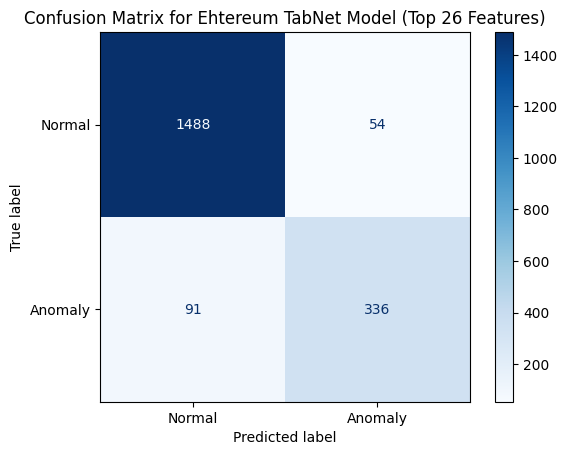

Accuracy: 0.9264
Precision: 0.8615
Recall: 0.7869
F1 Score: 0.8225
ROC AUC: 0.9109


In [103]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary modules
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# Set reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Ethereum data
eth_file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/transaction_dataset.csv'
eth_df = pd.read_csv(eth_file_path)

# Select relevant columns
eth_df = eth_df[['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx', 'Time Diff between first and last (Mins)',
       'Sent tnx', 'Received Tnx', 'Number of Created Contracts',
       'Unique Received From Addresses', 'Unique Sent To Addresses',
       'min value received', 'max value received ', 'avg val received',
       'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type']]

# Select numeric columns only
eth_df = eth_df.select_dtypes(include=['number'])
target_column = 'FLAG'

# Replace NaN values with zeros
#eth_df = eth_df.fillna(0)
# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with mean
eth_df = pd.DataFrame(imputer.fit_transform(eth_df), columns=eth_df.columns)

# Compute correlations with the target variable
correlation = eth_df.corr()
top_features = correlation[target_column].abs().sort_values(ascending=False).index[1:26]  # Select top 26 features
print("Top Correlated Features:", list(top_features))

# Create dataset with top correlated features
eth_df_top = eth_df[top_features.to_list() + [target_column]]

# Define features (X) and target (y)
X = eth_df_top.drop(columns=[target_column])
y = eth_df_top[target_column].astype(int)  # Ensure the target is binary

# Split data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Scale data to avoid data leakage
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

# Initialize the TabNet model
tabnet_model = TabNetClassifier()

# Train the TabNet model
tabnet_model.fit(
    X_train_full, y_train_full,
    eval_set=[(X_train_full, y_train_full), (X_test_full, y_test_full)],
    eval_metric=['accuracy'],  # Use additional metrics as needed
    max_epochs=10,
    patience=5,
    batch_size=1024,
    virtual_batch_size=64
)

# Evaluate the model on the test set
y_pred = tabnet_model.predict(X_test_full)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test_full, y_pred))

conf_matrix = confusion_matrix(y_test_full, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ehtereum TabNet Model (Top 26 Features)')
plt.show()

# Calculate and print additional metrics
precision = precision_score(y_test_full, y_pred)
recall = recall_score(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred)
accuracy = accuracy_score(y_test_full, y_pred)
roc_auc = roc_auc_score(y_test_full, tabnet_model.predict_proba(X_test_full)[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


# **plot results**

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


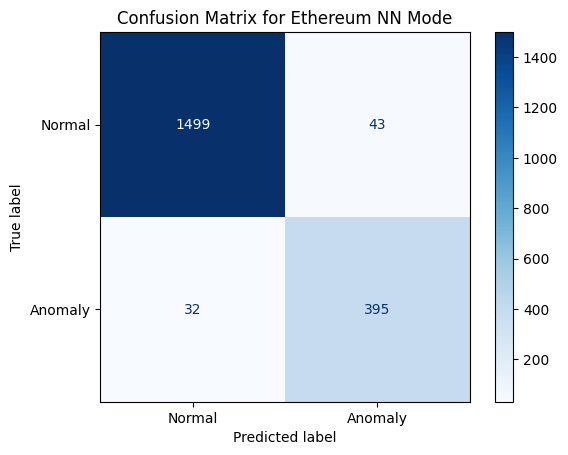

NN Metrics:
Accuracy: 0.9619
Precision: 0.9018
Recall: 0.9251
F1 Score: 0.9133
ROC AUC: 0.9109
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


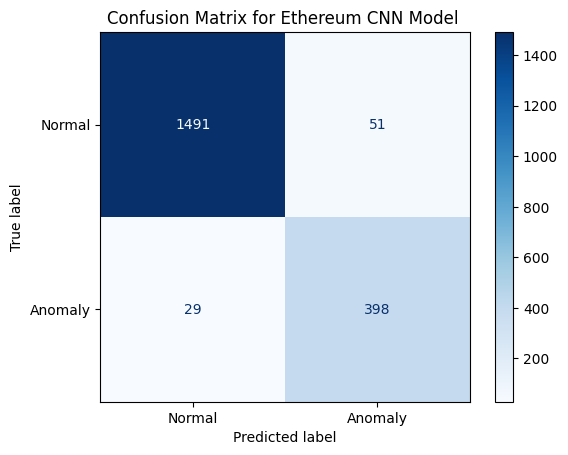

CNN Metrics:
Accuracy: 0.9594
Precision: 0.8864
Recall: 0.9321
F1 Score: 0.9087
ROC AUC: 0.9109


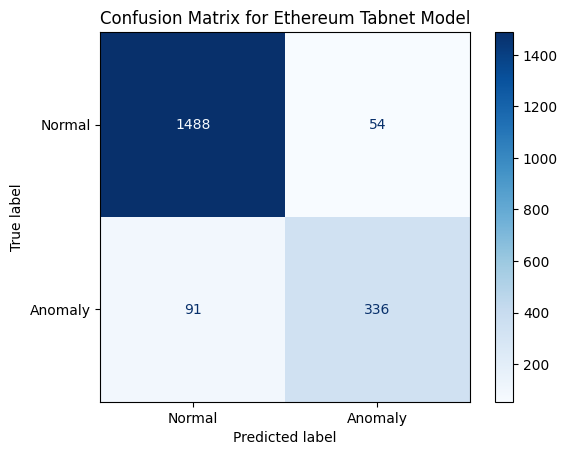

TabNet Metrics:
Accuracy: 0.9264
Precision: 0.8615
Recall: 0.7869
F1 Score: 0.8225
ROC AUC: 0.9109


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay,
    classification_report, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
)
from sklearn.preprocessing import label_binarize

# NN Confusion Matrix
y_pred_nn = nn_model.predict(X_test_full) > 0.5  # Assuming sigmoid and binary output
y_pred_nn = y_pred_nn.astype(int)
conf_matrix_nn = confusion_matrix(y_test_full, y_pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nn, display_labels=['Normal', 'Anomaly'])
disp_nn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ethereum NN Mode')
plt.show()

# Print metrics for NN
precision_nn = precision_score(y_test_full, y_pred_nn)
recall_nn = recall_score(y_test_full, y_pred_nn)
f1_nn = f1_score(y_test_full, y_pred_nn)
accuracy_nn = accuracy_score(y_test_full, y_pred_nn)

print("NN Metrics:")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1 Score: {f1_nn:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# CNN Confusion Matrix
y_pred_cnn = cnn_model.predict(X_test_reshaped) > 0.5  # Assuming sigmoid and binary output
y_pred_cnn = y_pred_cnn.astype(int)
conf_matrix_cnn = confusion_matrix(y_test_full, y_pred_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_cnn, display_labels=['Normal', 'Anomaly'])
disp_cnn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ethereum CNN Model ')
plt.show()

# Print metrics for CNN
precision_cnn = precision_score(y_test_full, y_pred_cnn)
recall_cnn = recall_score(y_test_full, y_pred_cnn)
f1_cnn = f1_score(y_test_full, y_pred_cnn)
accuracy_cnn = accuracy_score(y_test_full, y_pred_cnn)

print("CNN Metrics:")
print(f"Accuracy: {accuracy_cnn:.4f}")
print(f"Precision: {precision_cnn:.4f}")
print(f"Recall: {recall_cnn:.4f}")
print(f"F1 Score: {f1_cnn:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# TabNet Confusion Matrix
y_pred_tabnet = tabnet_model.predict(X_test_full)
conf_matrix_tabnet = confusion_matrix(y_test_full, y_pred_tabnet)
disp_tabnet = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tabnet, display_labels=['Normal', 'Anomaly'])
disp_tabnet.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ethereum Tabnet Model')
plt.show()

# Print metrics for TabNet
precision_tabnet = precision_score(y_test_full, y_pred_tabnet)
recall_tabnet = recall_score(y_test_full, y_pred_tabnet)
f1_tabnet = f1_score(y_test_full, y_pred_tabnet)
accuracy_tabnet = accuracy_score(y_test_full, y_pred_tabnet)

print("TabNet Metrics:")
print(f"Accuracy: {accuracy_tabnet:.4f}")
print(f"Precision: {precision_tabnet:.4f}")
print(f"Recall: {recall_tabnet:.4f}")
print(f"F1 Score: {f1_tabnet:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


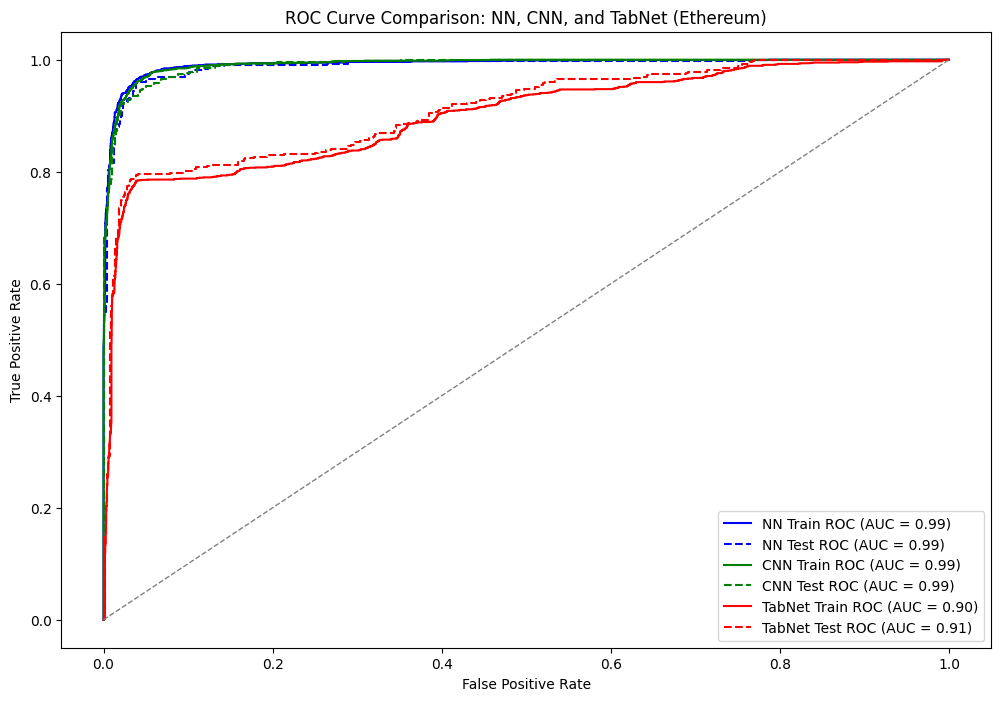

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate probabilities for NN
y_prob_nn_train = nn_model.predict(X_train_full).ravel()
y_prob_nn_test = nn_model.predict(X_test_full).ravel()
fpr_nn_train, tpr_nn_train, _ = roc_curve(y_train_full, y_prob_nn_train)
roc_auc_nn_train = auc(fpr_nn_train, tpr_nn_train)
fpr_nn_test, tpr_nn_test, _ = roc_curve(y_test_full, y_prob_nn_test)
roc_auc_nn_test = auc(fpr_nn_test, tpr_nn_test)

# Generate probabilities for CNN
y_prob_cnn_train = cnn_model.predict(X_train_full.reshape(-1, X_train_full.shape[1], 1)).ravel()
y_prob_cnn_test = cnn_model.predict(X_test_full.reshape(-1, X_test_full.shape[1], 1)).ravel()
fpr_cnn_train, tpr_cnn_train, _ = roc_curve(y_train_full, y_prob_cnn_train)
roc_auc_cnn_train = auc(fpr_cnn_train, tpr_cnn_train)
fpr_cnn_test, tpr_cnn_test, _ = roc_curve(y_test_full, y_prob_cnn_test)
roc_auc_cnn_test = auc(fpr_cnn_test, tpr_cnn_test)

# Generate probabilities for TabNet
y_prob_tabnet_train = tabnet_model.predict_proba(X_train_full)[:, 1]
y_prob_tabnet_test = tabnet_model.predict_proba(X_test_full)[:, 1]
fpr_tabnet_train, tpr_tabnet_train, _ = roc_curve(y_train_full, y_prob_tabnet_train)
roc_auc_tabnet_train = auc(fpr_tabnet_train, tpr_tabnet_train)
fpr_tabnet_test, tpr_tabnet_test, _ = roc_curve(y_test_full, y_prob_tabnet_test)
roc_auc_tabnet_test = auc(fpr_tabnet_test, tpr_tabnet_test)

# Plot all ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr_nn_train, tpr_nn_train, label=f'NN Train ROC (AUC = {roc_auc_nn_train:.2f})', color='blue', linestyle='-')
plt.plot(fpr_nn_test, tpr_nn_test, label=f'NN Test ROC (AUC = {roc_auc_nn_test:.2f})', color='blue', linestyle='--')
plt.plot(fpr_cnn_train, tpr_cnn_train, label=f'CNN Train ROC (AUC = {roc_auc_cnn_train:.2f})', color='green', linestyle='-')
plt.plot(fpr_cnn_test, tpr_cnn_test, label=f'CNN Test ROC (AUC = {roc_auc_cnn_test:.2f})', color='green', linestyle='--')
plt.plot(fpr_tabnet_train, tpr_tabnet_train, label=f'TabNet Train ROC (AUC = {roc_auc_tabnet_train:.2f})', color='red', linestyle='-')
plt.plot(fpr_tabnet_test, tpr_tabnet_test, label=f'TabNet Test ROC (AUC = {roc_auc_tabnet_test:.2f})', color='red', linestyle='--')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Diagonal line

# Labels, legend, and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: NN, CNN, and TabNet (Ethereum)')
plt.legend(loc='lower right')
plt.show()


In [108]:
from pytorch_tabnet.tab_model import TabNetClassifier

# Load pretrained model
tabnet_clf = TabNetClassifier()
tabnet_clf.load_model('/content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_wallet_model.zip')

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:454: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control

#**Transfer from NN Bitcion**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Top Correlated Features: ['Time Diff between first and last (Mins)', 'Avg min between received tnx', 'total transactions (including tnx to create contract', 'Received Tnx', 'Sent tnx', 'avg val sent', 'Unique Sent To Addresses', 'Unique Received From Addresses', 'Avg min between sent tnx', 'max val sent', 'min value received', ' Total ERC20 tnxs', ' ERC20 min val sent', ' ERC20 avg val sent', ' ERC20 max val sent', ' ERC20 total ether sent', 'max value received ', ' ERC20 uniq sent addr', 'total ether received', ' ERC20 uniq rec contract addr', 'total Ether sent', ' ERC20 uniq rec token name', ' ERC20 uniq rec addr', 'Number of Created Contracts', 'avg val received']
Pre-trained Bitcoin NN model loaded.
Skipping incompatible layer 'dense_122': Layer dense_122 weight shape (25, 128) is not compatible with provided weight shape (7, 64).
Skipping incompatible layer 'dense_123': Layer dense_123 weight shape (128, 64) is not compatible with provided weight shape (64, 32).
Skipping incompati

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7736 - loss: 0.5091 - val_accuracy: 0.8571 - val_loss: 0.3212
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8686 - loss: 0.3368 - val_accuracy: 0.9232 - val_loss: 0.2655
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8869 - loss: 0.2805 - val_accuracy: 0.9352 - val_loss: 0.2357
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8999 - loss: 0.2512 - val_accuracy: 0.9384 - val_loss: 0.2131
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9147 - loss: 0.2295 - val_accuracy: 0.9390 - val_loss: 0.1921
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9255 - loss: 0.2132 - val_accuracy: 0.9403 - val_loss: 0.1777
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9281 - loss: 0.2017 - val_accuracy: 0.9454 - val_loss: 0.1661
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9375 - loss: 0.1848 - val_accuracy: 0.9460 - val_

Fine-tuned from bitcion NN Accuracy: 95.23%
Fine-tuned Wallet NN model saved to: /content/drive/MyDrive/BlockChainAnomaly/Data/Ethereum_nn_model_fine_tuned.h5
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


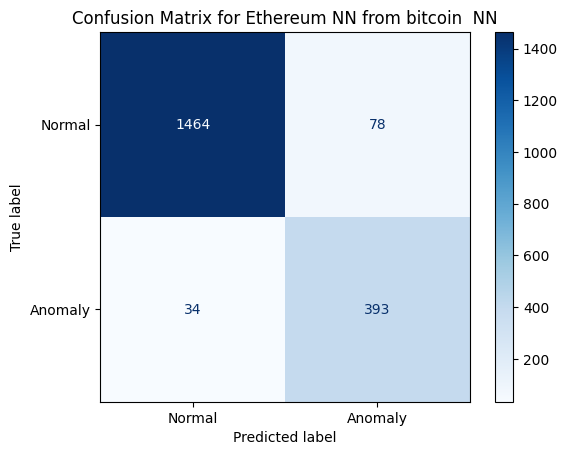

Confusion Matrix:
[[1464   78]
 [  34  393]]
Accuracy: 0.9431
Precision: 0.8344
Recall: 0.9204
F1 Score: 0.8753
ROC AUC: 0.9824


In [132]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary modules
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# Set reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Ethereum data
eth_file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/transaction_dataset.csv'
eth_df = pd.read_csv(eth_file_path)

# Select relevant columns
eth_df = eth_df[['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx', 'Time Diff between first and last (Mins)',
       'Sent tnx', 'Received Tnx', 'Number of Created Contracts',
       'Unique Received From Addresses', 'Unique Sent To Addresses',
       'min value received', 'max value received ', 'avg val received',
       'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type']]

# Select numeric columns only
eth_df = eth_df.select_dtypes(include=['number'])
target_column = 'FLAG'

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with mean
eth_df = pd.DataFrame(imputer.fit_transform(eth_df), columns=eth_df.columns)

# Compute correlations with the target variable
correlation = eth_df.corr()
top_features = correlation[target_column].abs().sort_values(ascending=False).index[1:26]  # Select top 26 features
print("Top Correlated Features:", list(top_features))

# Create dataset with top correlated features
eth_df_top = eth_df[top_features.to_list() + [target_column]]

# Define features (X) and target (y)
X = eth_df_top.drop(columns=[target_column])
y = eth_df_top[target_column].astype(int)  # Ensure the target is binary

# Split data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Scale data to avoid data leakage
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

# Load the pre-trained Bitcoin NN model
bitcoin_nn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/nn_bitcoin_model.h5'
bitcoin_nn_model = models.load_model(bitcoin_nn_model_path)
print("Pre-trained Bitcoin NN model loaded.")

# Create a new NN model for Wallet data

# Step 2: Model Architecture Adjustments (Example)
wallet_nn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_full.shape[1],)),  # Match Bitcoin model
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


# Transfer weights from Bitcoin NN to Wallet NN
for layer, bitcoin_layer in zip(wallet_nn_model.layers, bitcoin_nn_model.layers):
    try:
        if isinstance(layer, layers.Dense):
            layer.set_weights(bitcoin_layer.get_weights())
            layer.trainable = False  # Freeze the layers
    except ValueError as e:
        print(f"Skipping incompatible layer '{layer.name}': {e}")

# Compile the Wallet NN model
wallet_nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Wallet NN model on Wallet data
history_wallet_nn = wallet_nn_model.fit(
    X_train_full, y_train_full, epochs=10, batch_size=32, validation_split=0.2
)

# Unfreeze layers for fine-tuning
for layer in wallet_nn_model.layers:
    layer.trainable = True

# Evaluate the model
nn_loss, nn_acc = wallet_nn_model.evaluate(X_test_full, y_test_full)
print(f"Fine-tuned from bitcion NN Accuracy: {nn_acc * 100:.2f}%")

# Save the fine-tuned Wallet NN model
wallet_nn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/Ethereum_nn_model_fine_tuned.h5'
wallet_nn_model.save(wallet_nn_model_path)
print(f"Fine-tuned Wallet NN model saved to: {wallet_nn_model_path}")

# Generate predictions
y_pred_prob = wallet_nn_model.predict(X_test_full).ravel()  # Get probabilities
y_pred = (y_pred_prob > 0.3).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_full, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ethereum NN from bitcoin  NN')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)

# Calculate metrics
precision = precision_score(y_test_full, y_pred)
recall = recall_score(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred)
accuracy = accuracy_score(y_test_full, y_pred)
roc_auc = roc_auc_score(y_test_full, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


#**Transfer from NN Wallet**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Top Correlated Features: ['Time Diff between first and last (Mins)', 'Avg min between received tnx', 'total transactions (including tnx to create contract', 'Received Tnx', 'Sent tnx', 'avg val sent', 'Unique Sent To Addresses', 'Unique Received From Addresses', 'Avg min between sent tnx', 'max val sent', 'min value received', ' Total ERC20 tnxs', ' ERC20 min val sent', ' ERC20 avg val sent', ' ERC20 max val sent', ' ERC20 total ether sent', 'max value received ', ' ERC20 uniq sent addr', 'total ether received', ' ERC20 uniq rec contract addr', 'total Ether sent', ' ERC20 uniq rec token name', ' ERC20 uniq rec addr', 'Number of Created Contracts', 'avg val received']
Pre-trained Bitcoin NN model loaded.
Skipping incompatible layer 'dense_125': Layer dense_125 weight shape (25, 128) is not compatible with provided weight shape (56, 128).
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3262 - loss: 1.6899 - val_accuracy: 0.7498 - val_loss: 0.5090
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7801 - loss: 0.4895 - val_accuracy: 0.8819 - val_loss: 0.3387
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8497 - loss: 0.3529 - val_accuracy: 0.9010 - val_loss: 0.2849
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8667 - loss: 0.3317 - val_accuracy: 0.9244 - val_loss: 0.2515
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8859 - loss: 0.2849 - val_accuracy: 0.9238 - val_loss: 0.2400
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8926 - loss: 0.2714 - val_accuracy: 0.9206 - val_loss: 0.2226
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9038 - loss: 0.2606 - val_accuracy: 0.9270 - val_loss: 0.2136
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9008 - loss: 0.2673 - val_accuracy: 0.9308 - val_

Fine-tuned from wallet NN Accuracy: 94.36%
Fine-tuned Wallet NN model saved to: /content/drive/MyDrive/BlockChainAnomaly/Data/Ethereum_nn_model_fine_tuned.h5
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


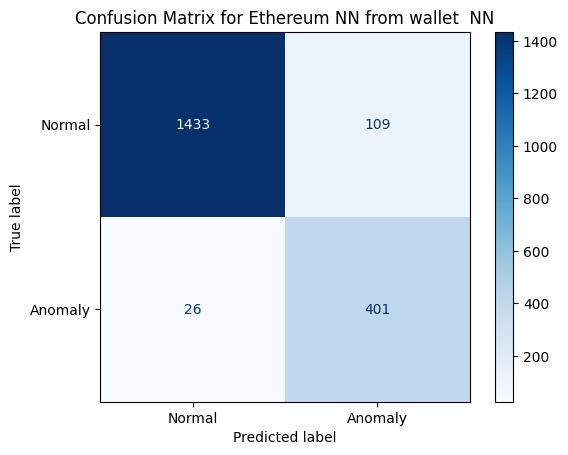

Confusion Matrix:
[[1433  109]
 [  26  401]]
Accuracy: 0.9314
Precision: 0.7863
Recall: 0.9391
F1 Score: 0.8559
ROC AUC: 0.9707


In [133]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary modules
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# Set reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Ethereum data
eth_file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/transaction_dataset.csv'
eth_df = pd.read_csv(eth_file_path)

# Select relevant columns
eth_df = eth_df[['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx', 'Time Diff between first and last (Mins)',
       'Sent tnx', 'Received Tnx', 'Number of Created Contracts',
       'Unique Received From Addresses', 'Unique Sent To Addresses',
       'min value received', 'max value received ', 'avg val received',
       'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type']]

# Select numeric columns only
eth_df = eth_df.select_dtypes(include=['number'])
target_column = 'FLAG'

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with mean
eth_df = pd.DataFrame(imputer.fit_transform(eth_df), columns=eth_df.columns)

# Compute correlations with the target variable
correlation = eth_df.corr()
top_features = correlation[target_column].abs().sort_values(ascending=False).index[1:26]  # Select top 26 features
print("Top Correlated Features:", list(top_features))

# Create dataset with top correlated features
eth_df_top = eth_df[top_features.to_list() + [target_column]]

# Define features (X) and target (y)
X = eth_df_top.drop(columns=[target_column])
y = eth_df_top[target_column].astype(int)  # Ensure the target is binary

# Split data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Scale data to avoid data leakage
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

# Load the pre-trained Bitcoin NN model
bitcoin_nn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/nn_wallet_model.h5'
bitcoin_nn_model = models.load_model(bitcoin_nn_model_path)
print("Pre-trained Bitcoin NN model loaded.")

# Create a new NN model for Wallet data

# Step 2: Model Architecture Adjustments (Example)
wallet_nn_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_full.shape[1],)),  # Match Bitcoin model
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


# Transfer weights from Bitcoin NN to Wallet NN
for layer, bitcoin_layer in zip(wallet_nn_model.layers, bitcoin_nn_model.layers):
    try:
        if isinstance(layer, layers.Dense):
            layer.set_weights(bitcoin_layer.get_weights())
            layer.trainable = False  # Freeze the layers
    except ValueError as e:
        print(f"Skipping incompatible layer '{layer.name}': {e}")

# Compile the Wallet NN model
wallet_nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Wallet NN model on Wallet data
history_wallet_nn = wallet_nn_model.fit(
    X_train_full, y_train_full, epochs=10, batch_size=32, validation_split=0.2
)

# Unfreeze layers for fine-tuning
for layer in wallet_nn_model.layers:
    layer.trainable = True

# Evaluate the model
nn_loss, nn_acc = wallet_nn_model.evaluate(X_test_full, y_test_full)
print(f"Fine-tuned from wallet NN Accuracy: {nn_acc * 100:.2f}%")

# Save the fine-tuned Wallet NN model
wallet_nn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/Ethereum_nn_model_fine_tuned.h5'
wallet_nn_model.save(wallet_nn_model_path)
print(f"Fine-tuned Wallet NN model saved to: {wallet_nn_model_path}")

# Generate predictions
y_pred_prob = wallet_nn_model.predict(X_test_full).ravel()  # Get probabilities
y_pred = (y_pred_prob > 0.3).astype(int)  # Convert probabilities to binary predictions

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_full, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ethereum NN from wallet  NN')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)

# Calculate metrics
precision = precision_score(y_test_full, y_pred)
recall = recall_score(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred)
accuracy = accuracy_score(y_test_full, y_pred)
roc_auc = roc_auc_score(y_test_full, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


#**Transfer from CNN Wallet**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Top Correlated Features: ['Time Diff between first and last (Mins)', 'Avg min between received tnx', 'total transactions (including tnx to create contract', 'Received Tnx', 'Sent tnx', 'avg val sent', 'Unique Sent To Addresses', 'Unique Received From Addresses', 'Avg min between sent tnx', 'max val sent', 'min value received', ' Total ERC20 tnxs', ' ERC20 min val sent', ' ERC20 avg val sent', ' ERC20 max val sent', ' ERC20 total ether sent', 'max value received ', ' ERC20 uniq sent addr', 'total ether received', ' ERC20 uniq rec contract addr', 'total Ether sent', ' ERC20 uniq rec token name', ' ERC20 uniq rec addr', 'Number of Created Contracts', 'avg val received']
X_train_reshaped shape: (7872, 25, 1)
X_test_reshaped shape: (1969, 25, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pre-trained Bitcoin CNN model loaded.
Skipping incompatible layer 'conv1d_6': Layer conv1d_6 weight shape (3, 1, 64) is not compatible with provided weight shape (3, 1, 32).
Skipping incompatible layer 'dense_130': Layer dense_130 weight shape (704, 64) is not compatible with provided weight shape (864, 64).
Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7750 - loss: 0.4959 - val_accuracy: 0.8533 - val_loss: 0.3281
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8618 - loss: 0.3205 - val_accuracy: 0.8610 - val_loss: 0.2597
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8852 - loss: 0.2572 - val_accuracy: 0.9111 - val_loss: 0.2297
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9181 - loss: 0.2270 - val_accuracy: 0.9308 - val_loss: 0.2070
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9273 - loss: 0.2068 - val_accuracy: 0.9410 - val_loss: 0.1911
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/st

Fine-tuned Ethererum CNN Accuracy: 95.43%
Fine-tuned Wallet CNN model saved to: /content/drive/MyDrive/BlockChainAnomaly/Data/Ethereum_cnn_model_fine_tuned.h5
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


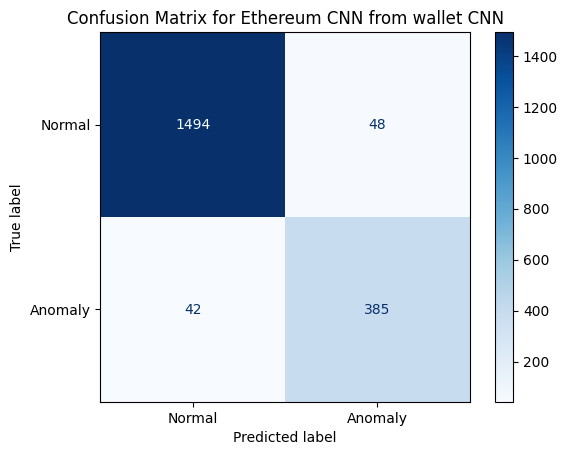

Confusion Matrix:
[[1494   48]
 [  42  385]]
Accuracy: 0.9543
Precision: 0.8891
Recall: 0.9016
F1 Score: 0.8953
ROC AUC: 0.9811


In [138]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary modules
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# Set reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Ethereum data
eth_file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/transaction_dataset.csv'
eth_df = pd.read_csv(eth_file_path)

# Select relevant columns
eth_df = eth_df[['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx', 'Time Diff between first and last (Mins)',
       'Sent tnx', 'Received Tnx', 'Number of Created Contracts',
       'Unique Received From Addresses', 'Unique Sent To Addresses',
       'min value received', 'max value received ', 'avg val received',
       'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type']]

# Select numeric columns only
eth_df = eth_df.select_dtypes(include=['number'])
target_column = 'FLAG'

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with mean
eth_df = pd.DataFrame(imputer.fit_transform(eth_df), columns=eth_df.columns)

# Compute correlations with the target variable
correlation = eth_df.corr()
top_features = correlation[target_column].abs().sort_values(ascending=False).index[1:26]  # Select top 26 features
print("Top Correlated Features:", list(top_features))

# Create dataset with top correlated features
eth_df_top = eth_df[top_features.to_list() + [target_column]]

# Define features (X) and target (y)
X = eth_df_top.drop(columns=[target_column])
y = eth_df_top[target_column].astype(int)  # Ensure the target is binary

# Split data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Scale data to avoid data leakage
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

# Reshape for Conv1D

X_train_reshaped = X_train_full.reshape(-1, X_train_full.shape[1], 1)
X_test_reshaped = X_test_full.reshape(-1, X_test_full.shape[1], 1)



# Verify reshaped data sizes
print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)

# Load pre-trained Bitcoin CNN model
wallet_cnn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/cnn_wallet_model.h5'
wallet_cnn_model = models.load_model(wallet_cnn_model_path)
print("Pre-trained Bitcoin CNN model loaded.")

# Transfer learning: Create Wallet CNN model
ehtereum_cnn_model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


# Transfer weights from Bitcoin CNN to Wallet CNN
for layer, wallet_layer in zip(ehtereum_cnn_model.layers, wallet_cnn_model.layers):
    try:
        if isinstance(layer, (layers.Conv1D, layers.Dense)):
            layer.set_weights(wallet_layer.get_weights())
            layer.trainable = False
    except ValueError as e:
        print(f"Skipping incompatible layer '{layer.name}': {e}")

# Compile Wallet CNN model
ehtereum_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Wallet CNN model
ehtereum_cnn_model.fit(X_train_reshaped, y_train_full, epochs=10, batch_size=32, validation_split=0.2)

# Unfreeze layers for fine-tuning
for layer in ehtereum_cnn_model.layers:
    layer.trainable = True


# Evaluate the fine-tuned Wallet CNN model
Ethererum_loss, Ethererum_acc = ehtereum_cnn_model.evaluate(X_test_reshaped, y_test_full)
print(f"Fine-tuned Ethererum CNN Accuracy: {Ethererum_acc * 100:.2f}%")

# Save the fine-tuned Wallet CNN model
ehtereum_cnn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/Ethereum_cnn_model_fine_tuned.h5'
ehtereum_cnn_model.save(wallet_cnn_model_path)
print(f"Fine-tuned Wallet CNN model saved to: {ehtereum_cnn_model_path}")

# Generate predictions
y_pred_prob = ehtereum_cnn_model.predict(X_test_reshaped).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_full, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ethereum CNN from wallet CNN')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)

# Calculate metrics
precision = precision_score(y_test_full, y_pred)
recall = recall_score(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred)
accuracy = accuracy_score(y_test_full, y_pred)
roc_auc = roc_auc_score(y_test_full, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


#**Transfer from CNN Bitcoin**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Top Correlated Features: ['Time Diff between first and last (Mins)', 'Avg min between received tnx', 'total transactions (including tnx to create contract', 'Received Tnx', 'Sent tnx', 'avg val sent', 'Unique Sent To Addresses', 'Unique Received From Addresses', 'Avg min between sent tnx', 'max val sent', 'min value received', ' Total ERC20 tnxs', ' ERC20 min val sent', ' ERC20 avg val sent', ' ERC20 max val sent', ' ERC20 total ether sent', 'max value received ', ' ERC20 uniq sent addr', 'total ether received', ' ERC20 uniq rec contract addr', 'total Ether sent', ' ERC20 uniq rec token name', ' ERC20 uniq rec addr', 'Number of Created Contracts', 'avg val received']
X_train_reshaped shape: (7872, 25, 1)
X_test_reshaped shape: (1969, 25, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pre-trained Bitcoin CNN model loaded.
Skipping incompatible layer 'dense_134': You called `set_weights(weights)` on layer 'dense_134' with a weight list of length 0, but the layer was expecting 2 weights.
Skipping incompatible layer 'dense_135': Layer dense_135 weight shape (64, 1) is not compatible with provided weight shape (128, 32).
Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8289 - loss: 0.4435 - val_accuracy: 0.9016 - val_loss: 0.2730
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9018 - loss: 0.2517 - val_accuracy: 0.9289 - val_loss: 0.2268
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9283 - loss: 0.2100 - val_accuracy: 0.9333 - val_loss: 0.1983
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9370 - loss: 0.1871 - val_accuracy: 0.9333 - val_loss: 0.1767
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9427 - loss: 0.1717 - val_accuracy: 0.9390 - val_loss: 0.1652
Epoch 6/10
197/197 ━━

Fine-tuned Ethererum CNN Accuracy: 94.92%
Fine-tuned Wallet CNN model saved to: /content/drive/MyDrive/BlockChainAnomaly/Data/Ethereum_cnn_model_fine_tuned.h5
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


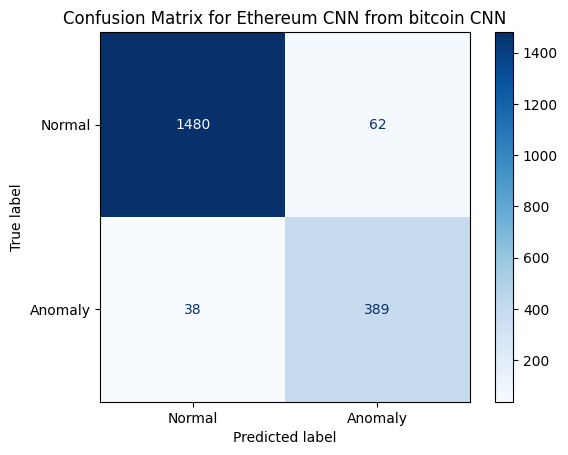

Confusion Matrix:
[[1480   62]
 [  38  389]]
Accuracy: 0.9492
Precision: 0.8625
Recall: 0.9110
F1 Score: 0.8861
ROC AUC: 0.9824


In [142]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary modules
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# Set reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Ethereum data
eth_file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/transaction_dataset.csv'
eth_df = pd.read_csv(eth_file_path)

# Select relevant columns
eth_df = eth_df[['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx', 'Time Diff between first and last (Mins)',
       'Sent tnx', 'Received Tnx', 'Number of Created Contracts',
       'Unique Received From Addresses', 'Unique Sent To Addresses',
       'min value received', 'max value received ', 'avg val received',
       'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type']]

# Select numeric columns only
eth_df = eth_df.select_dtypes(include=['number'])
target_column = 'FLAG'

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with mean
eth_df = pd.DataFrame(imputer.fit_transform(eth_df), columns=eth_df.columns)

# Compute correlations with the target variable
correlation = eth_df.corr()
top_features = correlation[target_column].abs().sort_values(ascending=False).index[1:26]  # Select top 26 features
print("Top Correlated Features:", list(top_features))

# Create dataset with top correlated features
eth_df_top = eth_df[top_features.to_list() + [target_column]]

# Define features (X) and target (y)
X = eth_df_top.drop(columns=[target_column])
y = eth_df_top[target_column].astype(int)  # Ensure the target is binary

# Split data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Scale data to avoid data leakage
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

# Reshape for Conv1D

X_train_reshaped = X_train_full.reshape(-1, X_train_full.shape[1], 1)
X_test_reshaped = X_test_full.reshape(-1, X_test_full.shape[1], 1)



# Verify reshaped data sizes
print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)

# Load pre-trained Bitcoin CNN model
bitcion_cnn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/cnn_bitcoin_model.h5'
bitcion_cnn_model = models.load_model(bitcion_cnn_model_path)
print("Pre-trained Bitcoin CNN model loaded.")

# Transfer learning: Create Wallet CNN model
ehtereum_cnn_model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


# Transfer weights from Bitcoin CNN to bitcion CNN
for layer, bitcion_layer in zip(ehtereum_cnn_model.layers, bitcion_cnn_model.layers):
    try:
        if isinstance(layer, (layers.Conv1D, layers.Dense)):
            layer.set_weights(bitcion_layer.get_weights())
            layer.trainable = False
    except ValueError as e:
        print(f"Skipping incompatible layer '{layer.name}': {e}")

# Compile Wallet CNN model
ehtereum_cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Wallet CNN model
ehtereum_cnn_model.fit(X_train_reshaped, y_train_full, epochs=10, batch_size=32, validation_split=0.2)

# Unfreeze layers for fine-tuning
for layer in ehtereum_cnn_model.layers:
    layer.trainable = True


# Evaluate the fine-tuned Wallet CNN model
Ethererum_loss, Ethererum_acc = ehtereum_cnn_model.evaluate(X_test_reshaped, y_test_full)
print(f"Fine-tuned Ethererum CNN Accuracy: {Ethererum_acc * 100:.2f}%")

# Save the fine-tuned Wallet CNN model
ehtereum_cnn_model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/Ethereum_cnn_model_fine_tuned.h5'
ehtereum_cnn_model.save(wallet_cnn_model_path)
print(f"Fine-tuned Wallet CNN model saved to: {ehtereum_cnn_model_path}")

# Generate predictions
y_pred_prob = ehtereum_cnn_model.predict(X_test_reshaped).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_full, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ethereum CNN from bitcoin CNN')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print(conf_matrix)

# Calculate metrics
precision = precision_score(y_test_full, y_pred)
recall = recall_score(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred)
accuracy = accuracy_score(y_test_full, y_pred)
roc_auc = roc_auc_score(y_test_full, y_pred_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


#**Transfer from Tabnet bitcion**

In [3]:
from pytorch_tabnet.tab_model import TabNetClassifier

# Load pretrained model
tabnet_model2 = TabNetClassifier()
tabnet_model2.load_model('/content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_bitcoin_model.zip')

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:454: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Top Correlated Features: ['Time Diff between first and last (Mins)', 'Avg min between received tnx', 'total transactions (including tnx to create contract', 'Received Tnx', 'Sent tnx', 'avg val sent', 'Unique Sent To Addresses', 'Unique Received From Addresses', 'Avg min between sent tnx', 'max val sent', 'min value received', ' Total ERC20 tnxs', ' ERC20 min val sent', ' ERC20 avg val sent', ' ERC20 max val sent', ' ERC20 total ether sent', 'max value received ', ' ERC20 uniq sent addr', 'total ether received', ' ERC20 uniq rec contract addr', 'total Ether sent', ' ERC20 uniq rec token name', ' ERC20 uniq rec addr', 'Number of Created Contracts', 'avg val received']
FLAG
0    7662
1    2179
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/di

Pre-trained TabNet model loaded from: /content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_bitcoin_model.zip
epoch 0  | loss: 0.72466 | val_0_accuracy: 0.525   | val_1_accuracy: 0.26308 |  0:00:03s
epoch 1  | loss: 0.65879 | val_0_accuracy: 0.52034 | val_1_accuracy: 0.25952 |  0:00:07s
epoch 2  | loss: 0.59903 | val_0_accuracy: 0.51871 | val_1_accuracy: 0.25089 |  0:00:10s
epoch 3  | loss: 0.5701  | val_0_accuracy: 0.59714 | val_1_accuracy: 0.36821 |  0:00:17s
epoch 4  | loss: 0.57101 | val_0_accuracy: 0.50711 | val_1_accuracy: 0.7613  |  0:00:20s
epoch 5  | loss: 0.54848 | val_0_accuracy: 0.69077 | val_1_accuracy: 0.613   |  0:00:22s
epoch 6  | loss: 0.51408 | val_0_accuracy: 0.70907 | val_1_accuracy: 0.59523 |  0:00:24s
epoch 7  | loss: 0.44277 | val_0_accuracy: 0.67124 | val_1_accuracy: 0.51955 |  0:00:27s
epoch 8  | loss: 0.39075 | val_0_accuracy: 0.69069 | val_1_accuracy: 0.59726 |  0:00:29s
epoch 9  | loss: 0.29409 | val_0_accuracy: 0.6893  | val_1_accuracy: 0.59624 |  0:00:31s
e

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1542
           1       0.80      0.83      0.82       427

    accuracy                           0.92      1969
   macro avg       0.88      0.89      0.88      1969
weighted avg       0.92      0.92      0.92      1969



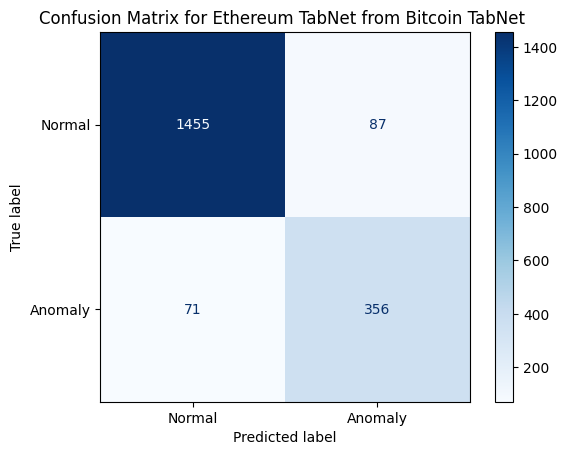

Accuracy: 0.9198
Precision: 0.8036
Recall: 0.8337
F1 Score: 0.8184
ROC AUC: 0.9535


In [11]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary modules
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from pytorch_tabnet.tab_model import TabNetClassifier
from imblearn.over_sampling import SMOTE

# Set reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Ethereum data
eth_file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/transaction_dataset.csv'
eth_df = pd.read_csv(eth_file_path)

# Select relevant columns
eth_df = eth_df[['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx', 'Time Diff between first and last (Mins)',
       'Sent tnx', 'Received Tnx', 'Number of Created Contracts',
       'Unique Received From Addresses', 'Unique Sent To Addresses',
       'min value received', 'max value received ', 'avg val received',
       'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type']]

# Select numeric columns only
eth_df = eth_df.select_dtypes(include=['number'])
target_column = 'FLAG'

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with mean
eth_df = pd.DataFrame(imputer.fit_transform(eth_df), columns=eth_df.columns)
# Compute correlations with the target variable
correlation = eth_df.corr()
top_features = correlation[target_column].abs().sort_values(ascending=False).index[1:26]  # Select top 26 features
print("Top Correlated Features:", list(top_features))

# Create dataset with top correlated features
eth_df_top = eth_df[top_features.to_list() + [target_column]]

# Create dataset with top correlated features
X = eth_df.drop(columns=[target_column])
y = eth_df[target_column].astype(int)  # Ensure the target is binary

# Check class distribution
print(y.value_counts())

# Split data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Scale data to avoid data leakage
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train_full)

# Initialize the TabNet model
tabnet_model = TabNetClassifier()

# Load the pre-trained Bitcoin TabNet model
model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_bitcoin_model.zip'
tabnet_model2 = TabNetClassifier()
tabnet_model2.load_model(model_path)
print(f"Pre-trained TabNet model loaded from: {model_path}")


tabnet_model2.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_train_resampled, y_train_resampled), (X_test_full, y_test_full)],
    eval_metric=['accuracy'],  # Use additional metrics as needed
    max_epochs=20,
    patience=10,
    batch_size=1024,
    virtual_batch_size=64,

)

# Evaluate the model on the test set
y_pred = tabnet_model2.predict(X_test_full)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test_full, y_pred))

conf_matrix = confusion_matrix(y_test_full, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ethereum TabNet from Bitcoin TabNet ')
plt.show()

# Calculate and print additional metrics
precision = precision_score(y_test_full, y_pred)
recall = recall_score(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred)
accuracy = accuracy_score(y_test_full, y_pred)
# Fix the issue with the `predict_proba()` method not being available in TabNet
y_pred_prob = tabnet_model2.predict_proba(X_test_full)[:, 1]
roc_auc = roc_auc_score(y_test_full, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


#**Transfer from Tabnet wallet**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
FLAG
0    7662
1    2179
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/di

Pre-trained TabNet model loaded from: /content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_wallet_model.zip
epoch 0  | loss: 0.65856 | val_0_accuracy: 0.57214 | val_1_accuracy: 0.3484  |  0:00:02s
epoch 1  | loss: 0.54601 | val_0_accuracy: 0.77549 | val_1_accuracy: 0.7034  |  0:00:06s
epoch 2  | loss: 0.48395 | val_0_accuracy: 0.69289 | val_1_accuracy: 0.55256 |  0:00:10s
epoch 3  | loss: 0.41318 | val_0_accuracy: 0.69559 | val_1_accuracy: 0.55358 |  0:00:13s
epoch 4  | loss: 0.31948 | val_0_accuracy: 0.89232 | val_1_accuracy: 0.93398 |  0:00:15s
epoch 5  | loss: 0.27618 | val_0_accuracy: 0.55286 | val_1_accuracy: 0.56679 |  0:00:17s
epoch 6  | loss: 0.23664 | val_0_accuracy: 0.66062 | val_1_accuracy: 0.64449 |  0:00:18s
epoch 7  | loss: 0.20203 | val_0_accuracy: 0.50637 | val_1_accuracy: 0.78009 |  0:00:20s
epoch 8  | loss: 0.20852 | val_0_accuracy: 0.68946 | val_1_accuracy: 0.54545 |  0:00:23s
epoch 9  | loss: 0.20105 | val_0_accuracy: 0.66503 | val_1_accuracy: 0.5353  |  0:00:25s
ep

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1542
           1       0.85      0.85      0.85       427

    accuracy                           0.93      1969
   macro avg       0.90      0.90      0.90      1969
weighted avg       0.93      0.93      0.93      1969



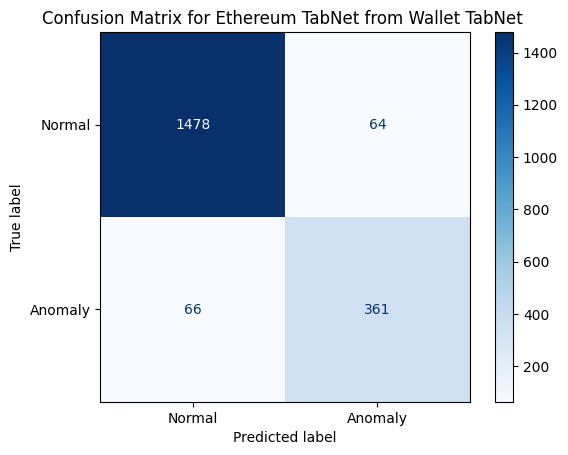

Accuracy: 0.9340
Precision: 0.8494
Recall: 0.8454
F1 Score: 0.8474
ROC AUC: 0.9535


In [18]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary modules
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
from pytorch_tabnet.tab_model import TabNetClassifier
from imblearn.over_sampling import SMOTE

# Set reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load Ethereum data
eth_file_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/transaction_dataset.csv'
eth_df = pd.read_csv(eth_file_path)

# Select relevant columns
eth_df = eth_df[['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx', 'Time Diff between first and last (Mins)',
       'Sent tnx', 'Received Tnx', 'Number of Created Contracts',
       'Unique Received From Addresses', 'Unique Sent To Addresses',
       'min value received', 'max value received ', 'avg val received',
       'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx',
       ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec',
       ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
       ' ERC20 uniq rec token name', ' ERC20 most sent token type',
       ' ERC20_most_rec_token_type']]

# Select numeric columns only
eth_df = eth_df.select_dtypes(include=['number'])
target_column = 'FLAG'

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with mean
eth_df = pd.DataFrame(imputer.fit_transform(eth_df), columns=eth_df.columns)
# Compute correlations with the target variable
#correlation = eth_df.corr()
#top_features = correlation[target_column].abs().sort_values(ascending=False).index[1:20]  # Select top 26 features
#print("Top Correlated Features:", list(top_features))

# Create dataset with top correlated features
#eth_df_top = eth_df[top_features.to_list() + [target_column]]

# Create dataset with top correlated features
X = eth_df.drop(columns=[target_column])
y = eth_df[target_column].astype(int)  # Ensure the target is binary

# Check class distribution
print(y.value_counts())

# Split data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Scale data to avoid data leakage
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_full, y_train_full)

# Initialize the TabNet model
tabnet_model = TabNetClassifier()

# Load the pre-trained Bitcoin TabNet model
model_path = '/content/drive/MyDrive/BlockChainAnomaly/Data/tabnet_wallet_model.zip'
tabnet_model3 = TabNetClassifier()
tabnet_model3.load_model(model_path)
print(f"Pre-trained TabNet model loaded from: {model_path}")


tabnet_model3.fit(
    X_train_resampled, y_train_resampled,
    eval_set=[(X_train_resampled, y_train_resampled), (X_test_full, y_test_full)],
    eval_metric=['accuracy'],  # Use additional metrics as needed
    max_epochs=25,
    patience=15,
    batch_size=512,
    virtual_batch_size=64,

)

# Evaluate the model on the test set
y_pred = tabnet_model3.predict(X_test_full)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test_full, y_pred))

conf_matrix = confusion_matrix(y_test_full, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Ethereum TabNet from Wallet TabNet ')
plt.show()

# Calculate and print additional metrics
precision = precision_score(y_test_full, y_pred)
recall = recall_score(y_test_full, y_pred)
f1 = f1_score(y_test_full, y_pred)
accuracy = accuracy_score(y_test_full, y_pred)
# Fix the issue with the `predict_proba()` method not being available in TabNet
y_pred_prob = tabnet_model2.predict_proba(X_test_full)[:, 1]
roc_auc = roc_auc_score(y_test_full, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
